In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_path="dataset/train"
test_path="dataset/test"
val_path="dataset/validation"

In [4]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [5]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [6]:
IMAGE_SIZE = [224, 224]

In [7]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 968 images belonging to 2 classes.
Found 293 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [10]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [11]:
training_set.class_indices

{'NonNude': 0, 'Nude': 1}

In [12]:
train_y.shape,test_y.shape,val_y.shape

((968,), (293,), (240,))

In [13]:
vgg_model = VGG19(weights='imagenet', include_top=False,input_shape=IMAGE_SIZE + [3])

In [13]:
# model = Sequential()


In [14]:
for layer in vgg_model.layers:
    layer.trainable = False


In [15]:
# for layer in model.layers:
#     layer.trainable = False
x = Flatten()(vgg_model.output)
prediction = Dense(3, activation='softmax')(x)

In [16]:
model = Model(inputs=vgg_model.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
# model.add(Flatten())
# model.add(Dense(2, activation='relu'))
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)


In [20]:
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle = True)

Epoch 1/10
31/31 [==============================] - 335s 11s/step - loss: 0.4479 - accuracy: 0.8368 - val_loss: 0.1830 - val_accuracy: 0.9375
Epoch 2/10
31/31 [==============================] - 331s 11s/step - loss: 0.0992 - accuracy: 0.9597 - val_loss: 0.2239 - val_accuracy: 0.9208
Epoch 3/10
31/31 [==============================] - 292s 9s/step - loss: 0.0435 - accuracy: 0.9886 - val_loss: 0.1904 - val_accuracy: 0.9375
Epoch 4/10
31/31 [==============================] - 258s 8s/step - loss: 0.0215 - accuracy: 0.9979 - val_loss: 0.1811 - val_accuracy: 0.9292
Epoch 5/10
31/31 [==============================] - 251s 8s/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.2068 - val_accuracy: 0.9250
Epoch 6/10
31/31 [==============================] - 257s 8s/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.1925 - val_accuracy: 0.9333
Epoch 7/10
31/31 [==============================] - 253s 8s/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.2113 - val_accuracy: 0.9333
Epoch 8/10


In [21]:
model.evaluate(test_x,test_y,batch_size=32)

10/10 [==============================] - 65s 7s/step - loss: 0.1732 - accuracy: 0.9420


[0.17319880425930023, 0.9419795274734497]

In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [23]:
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

10/10 [==============================] - 54s 5s/step


In [24]:
print(confusion_matrix(y_pred,test_y))

[[135   5]
 [ 12 141]]


In [25]:
accuracy_score(y_pred,test_y)

0.9419795221843004

In [26]:
model.save("nudity_final.h5")

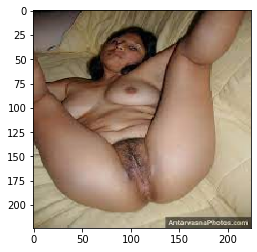

1/1 [==============================] - 0s 365ms/step
Nude


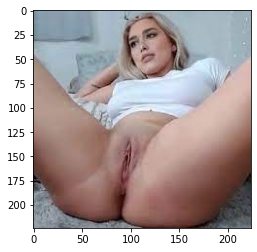

1/1 [==============================] - 0s 495ms/step
Nude


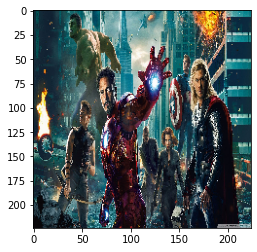

1/1 [==============================] - 0s 363ms/step
NonNude


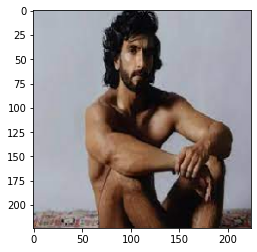

1/1 [==============================] - 1s 529ms/step
NonNude


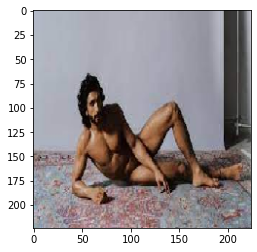

1/1 [==============================] - 0s 440ms/step
Nude


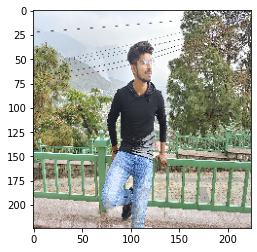

1/1 [==============================] - 0s 373ms/step
NonNude


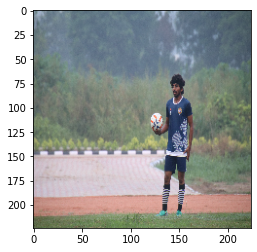

1/1 [==============================] - 0s 380ms/step
NonNude


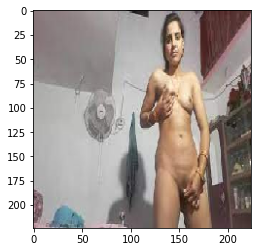

1/1 [==============================] - 0s 345ms/step
Nude


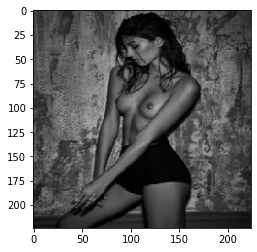

1/1 [==============================] - 0s 466ms/step
Nude


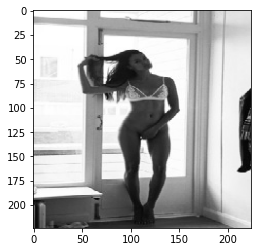

1/1 [==============================] - 0s 380ms/step
Nude


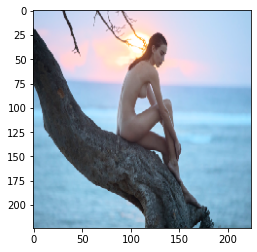

1/1 [==============================] - 0s 364ms/step
Nude


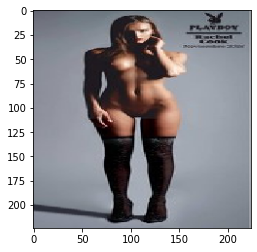

1/1 [==============================] - 0s 350ms/step
Nude


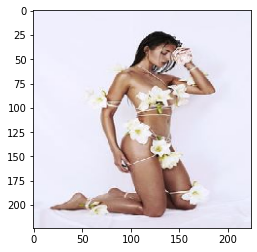

1/1 [==============================] - 0s 346ms/step
Nude


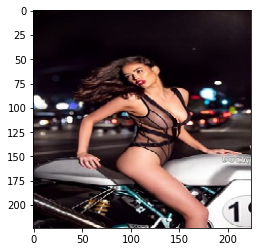

1/1 [==============================] - 0s 398ms/step
Nude


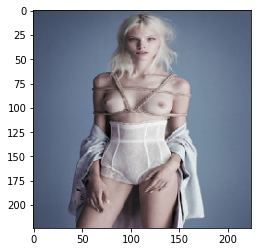

1/1 [==============================] - 0s 354ms/step
Nude


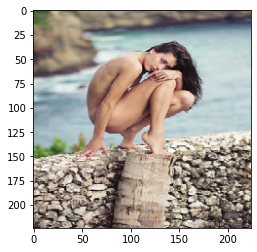

1/1 [==============================] - 0s 365ms/step
Nude


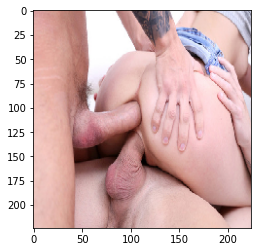

1/1 [==============================] - 0s 367ms/step
Nude


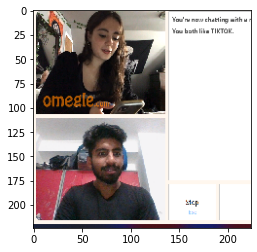

1/1 [==============================] - 0s 355ms/step
NonNude


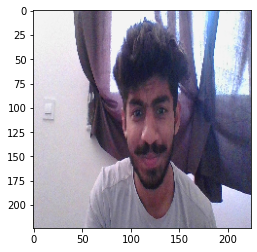

1/1 [==============================] - 0s 374ms/step
NonNude


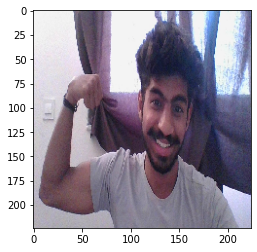

1/1 [==============================] - 0s 345ms/step
NonNude


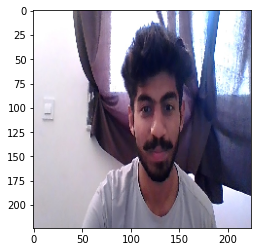

1/1 [==============================] - 0s 360ms/step
NonNude


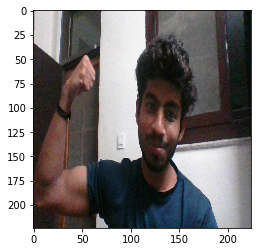

1/1 [==============================] - 0s 354ms/step
NonNude


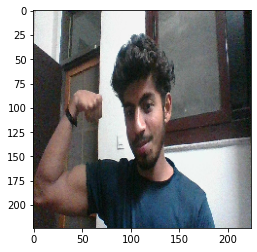

1/1 [==============================] - 0s 349ms/step
NonNude


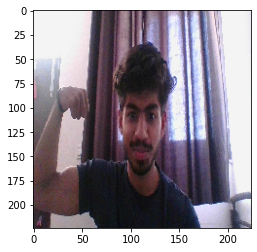

1/1 [==============================] - 0s 377ms/step
NonNude


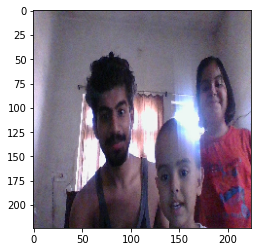

1/1 [==============================] - 0s 365ms/step
NonNude


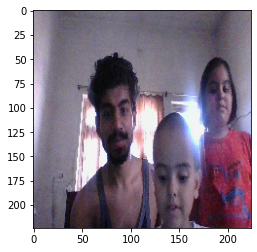

1/1 [==============================] - 0s 356ms/step
NonNude


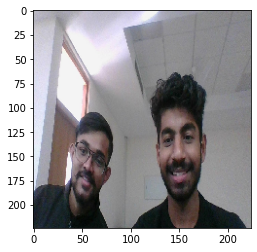

1/1 [==============================] - 0s 368ms/step
NonNude


In [31]:
path="check"
i=0
for img in os.listdir(path):
    img=image.load_img(path+"/"+img,target_size=(224,224))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    pred=model.predict(images,batch_size=1) 
    if pred[0][0]>0.5:
        category = "NonNude"
    elif pred[0][1]>0.5:
        category = "Nude"
#     elif pred[0][2]>0.5:
#         category = "Unknown"
    
    print(category)